# **Facial Emotion Detection**


---
## **Executive Summary**
---

- **Project Aim**: We developed a neural network model capable of identifying human emotions from facial expressions captured in images.
- **Data Utilization**: Our model training utilized a dataset comprised of grayscale images, each labeled with one of four distinct emotions: happy, neutral, sad, or surprise.
- **Model Exploration**: We engaged in extensive testing of various neural network architectures, including both custom-designed Convolutional Neural Networks (CNNs) and established transfer learning frameworks such as VGG16, ResNet50V2, and EfficientNetV2B0.
- **Performance Metrics**: The models were rigorously evaluated on multiple metrics including accuracy, precision, recall, and F1-score, aided by detailed confusion matrices for in-depth analysis.
- **Best Performer**: The standout model was a complex CNN featuring five convolutional blocks, which yielded the highest accuracy and performance metrics in tests.
- **Ethical Considerations**: For future deployments of the emotion detection model, we raise concerns about ethical considerations, focusing on ensuring privacy and fairness in real-world applications.
- **Real-World Application**: This model holds potential for significant impact in various sectors by enhancing user interface experiences and providing support tools for mental health professionals.
- **Future Work**: We propose further refinement of the model and the integration of additional safeguards to address ethical concerns more robustly.

---


---
## **Context**
---

Deep learning has been increasingly applied to tasks involving less structured data types like images, texts, audio, and video in recent years. These endeavors often aim to achieve human-like proficiency in processing such data, leveraging our innate ability to intelligently interact with complex, unstructured information. Within the realm of AI, a field known as Artificial Emotional Intelligence, or Emotion AI, focuses on creating technologies that can understand human emotions by analyzing body language, facial expressions, and voice tones, and respond to them effectively.

Recognizing facial expressions plays a vital role in human-computer interaction. Research indicates that facial expressions and other visual signals account for about 55% of how we convey emotions. Thus, developing a model capable of accurately recognizing facial emotions is a significant stride toward equipping machines with AI that exhibits emotionally intelligent behavior. Systems that can automatically recognize facial expressions have a broad range of potential applications, from understanding human behavior to diagnosing psychological conditions, and improving the interaction quality of virtual assistants in customer service settings.

---

## **Objective**

---

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

---

## **Key Questions**

---

Throughout the project, we will be answering the following questions:

- How accurately can the deep learning model identify and classify different facial emotions (happy, sad, surprise, neutral) from images?
- How well does the model generalize to new, unseen images? Can it maintain high accuracy across the test, train, and validation datasets?
- How does the different model architectures compare in terms of accuracy to classify the different emotions?
- What are the potential applications of the developed model, and what implications might its deployment have in some industry fields?

---

## **Problem Formulation**

---

We are tasked with leveraging Deep Learning techniques to develop a computer vision model capable of accurately detecting and classifying facial emotions. The model needs to distinguish between four specific emotions (happy, sad, surprise, neutral) based on images of facial expressions. This task involves multi-class classification, requiring the model to predict the correct category of emotion for each image it processes.

---

## **About the dataset**

---

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:** Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**


## **Importing the Libraries**


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import random
from PIL import Image
from typing import List
from datetime import datetime

# For Data Visualization
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model  # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input  # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, RMSprop  # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from keras.applications import VGG16
from keras.applications.resnet_v2 import preprocess_input as preprocess_input_resnetv2
from keras.applications import ResNet50V2
from keras.applications.efficientnet_v2 import preprocess_input as preprocess_input_efficientnetv2
from keras.applications import EfficientNetV2B0

### **Let us load and unzip the data**


**Note:**

- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.


In [2]:
# Storing the path of the data file from the Google drive
path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images.zip"

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, "r") as zip_ref:
    zip_ref.extractall()

## **Preparing the Data**

The dataset has three folders, i.e., 'train', 'validation' and 'test'. Each of these folders has four sub-folders, namely 'happy', 'neutral', 'sad', and 'surprise'.

We will have the train, validation and test path stored in a variable named 'SUBDIRS', and a base directory 'DATADIR'.

The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'.


In [3]:
DATADIR = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images"  # Base directory
SUBDIRS = ["train", "validation", "test"]  # Subdirectories
CATEGORIES = ["happy", "neutral", "sad", "surprise"]  # Emotion categories

We are going to check the size of one image, and then check if all the other images have the same size. In case, they are different, we'll resize the ones that are different.


In [4]:
def get_first_image_size(directory, sub_dirs, categories):
    """
    Returns the size of the first image found in the specified directories.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through (e.g., ['train', 'validation', 'test']).
    - categories (list of str): Categories (e.g., ['happy', 'neutral', 'sad', 'surprise']).

    Returns:
    - tuple: Size of the first image found (width, height).
    """
    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    return img.size  # Return the size of the first image found

In [5]:
# Get the size of the first image
expected_size = get_first_image_size(DATADIR, SUBDIRS, CATEGORIES)

print(f"Expected size of the first image: {expected_size}")

Expected size of the first image: (48, 48)


In [6]:
def check_image_sizes(directory, sub_dirs, categories, target_size):
    """
    Checks if all images in the specified directories match the target size.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through.
    - categories (list of str): Categories to search through.
    - target_size (tuple): The expected size of the images (width, height).

    Returns:
    - bool: True if all images match the target size, False otherwise.
    """
    all_match = True  # Flag to keep track of size match

    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    if img.size != target_size:
                        print(f"Image {img_path} has a different size: {img.size}, expected: {target_size}")
                        all_match = False
                        return all_match  # Return early upon first mismatch
    return all_match

In [7]:
# Check if all images match the expected size
all_match = check_image_sizes(DATADIR, SUBDIRS, CATEGORIES, expected_size)
if all_match:
    print("All images match the expected size.")
else:
    print("Not all images match the expected size.")

All images match the expected size.


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**


In [8]:
def visualize_emotion_images(directory: str, sub_dirs: List[str], emotion: str, image_count: int = 9) -> None:
    """
    Visualizes a specified number of images from a given emotion class directory across specified subdirectories.

    Parameters:
    - directory (str): The base directory where emotion class folders are located across subdirectories.
    - sub_dirs (List[str]): List of subdirectories ('train', 'validation', 'test') to search through.
    - emotion (str): The specific emotion class to visualize images from.
    - image_count (int): The number of images to display. Defaults to 9.

    Returns:
    - None: This function does not return any value but displays images inline.
    """
    image_paths: List[str] = []  # To store paths of images to be displayed

    # Iterate through the specified subdirectories to collect image paths
    for sub_dir in sub_dirs:
        emotion_dir: str = os.path.join(directory, sub_dir, emotion)
        if os.path.isdir(emotion_dir):
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                image_paths.append(img_path)

    # If there are no images found for the emotion, print a message and return
    if not image_paths:
        print(f"No images found for the specified emotion: {emotion}")
        return

    # Select a random subset of image paths
    selected_image_paths: np.ndarray = np.random.choice(image_paths, min(image_count, len(image_paths)), replace=False)

    # Setup for plotting
    fig = plt.figure(figsize=(4, 4))
    columns: int = 3
    rows: int = image_count // columns + (1 if image_count % columns else 0)

    # Iterate over the selected images and display them
    for i, image_path in enumerate(selected_image_paths, start=1):
        ax = fig.add_subplot(rows, columns, i)
        image = load_img(image_path, target_size=(48, 48))  # Ensure the image is resized to 48x48
        plt.imshow(image)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

### **Happy**


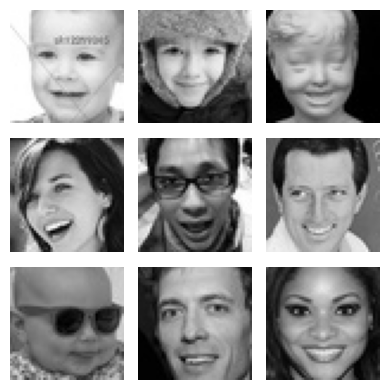

In [9]:
visualize_emotion_images(DATADIR, SUBDIRS, "happy", 9)

**Observations and Insights:**

- The images appear to be in grayscale and vary in terms of lighting, contrast, and clarity.

- The images display a range of happy expressions, from broad smiles showing teeth to subtle smiles without teeth. Also a diversity of subjects in terms of age, gender and also ethnicity.


### **Sad**


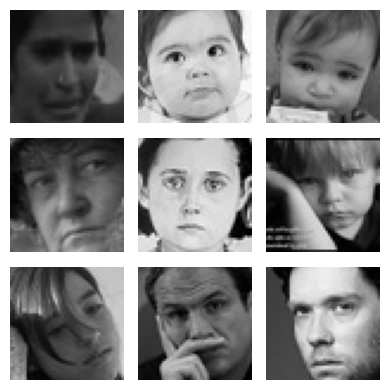

In [10]:
visualize_emotion_images(DATADIR, SUBDIRS, "sad", 9)

**Observations and Insights:**

- The images capture a wide spectrum of sadness, from subtle, somber expressions to more overt manifestations like crying.
- The dataset includes faces with different orientations and features. Some faces are directly looking at the camera, while others are tilted or partially turned away.


### **Neutral**


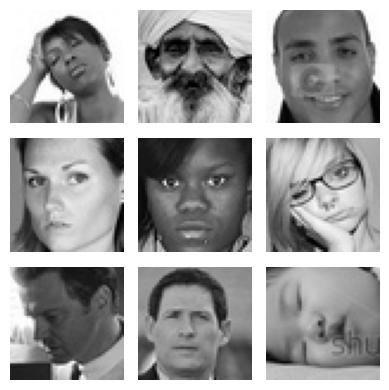

In [11]:
visualize_emotion_images(DATADIR, SUBDIRS, "neutral", 9)

**Observations and Insights:**

- The defining characteristic of these images is the absence of clear, expressive features that denote a specific emotion.
- Some faces may have subtle features that could be misconstrued as expressing a mild emotion.


### **Surprised**


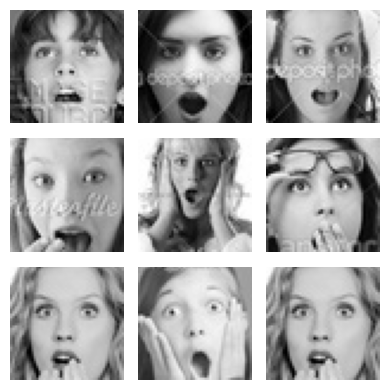

In [12]:
visualize_emotion_images(DATADIR, SUBDIRS, "surprise", 9)

**Observations and Insights:**

- The images showcase a range of intensities of surprise, from wide-eyed and open-mouthed expressions to more subdued, raised-eyebrow looks.
- The subjects vary in age, including both infants and adults.


## **Checking Distribution of Classes**


In [13]:
# Function to count images in each category
def count_images(data_dir, categories):
    counts = []
    for category in categories:
        path = os.path.join(data_dir, category)
        count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        counts.append(count)
    return counts


SUBDIRS_DICT = {"train": "train", "validation": "validation", "test": "test"}

# Counting images in each dataset
train_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["train"]), CATEGORIES)
validation_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["validation"]), CATEGORIES)
test_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["test"]), CATEGORIES)


# Create DataFrames and format for easier reading
def create_df(counts, categories, dataset_name):
    df = pd.DataFrame({"Class": categories, "Count": counts})
    df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100
    df.set_index("Class", inplace=True)

    # Formatting for easier reading
    df["Count"] = df["Count"].apply(lambda x: f"{x:,}")  # Adds commas to thousands
    df["Percentage"] = df["Percentage"].apply(lambda x: f"{x:.2f}")  # Rounds to two decimals

    print(f"{dataset_name} Data Distribution:")
    print(df)
    total_images = df["Count"].str.replace(",", "").astype(int).sum()
    print(f"Total images in {dataset_name}: {total_images:,}\n")  # Formats total count with commas


create_df(train_counts, CATEGORIES, "Training")
create_df(validation_counts, CATEGORIES, "Validation")
create_df(test_counts, CATEGORIES, "Testing")

Training Data Distribution:
          Count Percentage
Class                     
happy     3,976      26.32
neutral   3,978      26.33
sad       3,982      26.36
surprise  3,173      21.00
Total images in Training: 15,109

Validation Data Distribution:
          Count Percentage
Class                     
happy     1,825      36.67
neutral   1,216      24.43
sad       1,139      22.89
surprise    797      16.01
Total images in Validation: 4,977

Testing Data Distribution:
         Count Percentage
Class                    
happy       32      25.00
neutral     32      25.00
sad         32      25.00
surprise    32      25.00
Total images in Testing: 128



**Think About It:**

- Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
- Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?


**Observations and Insights:**

- Training Data: The training dataset shows a relatively balanced distribution among the classes of 'happy', 'neutral', and 'sad', each comprising approximately 26% of the dataset. However, 'surprise' is slightly underrepresented, making up 21% of the data. We'll see on the results if this is noticeable.
- Validation Data: In the validation dataset, there's a more pronounced imbalance. 'Happy' expressions dominate at 36.67%, followed by 'neutral' at 24.43%, 'sad' at 22.89%, and 'surprise' at 16.01%. This distribution deviates more significantly from an even split, indicating a potential bias towards 'happy' expressions.
- Testing Data: The testing dataset is perfectly balanced, with each class representing 25% of the data. This uniform distribution is ideal for evaluating the model's performance across all classes evenly.


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

Tested data: We have tested both 'grayscale' and 'rgb', and we got better results with 'grayscale', which makes sense as the images are in grayscale.


In [14]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"

# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
color_layers = 1
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness to simulate different lighting conditions
    shear_range=0.3,  # Shear transformations for perspective changes
    rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Creating train_dir, validation_dir, and test_dir directories using the structure of DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


Let's look at some examples of a batch of augmented training data.


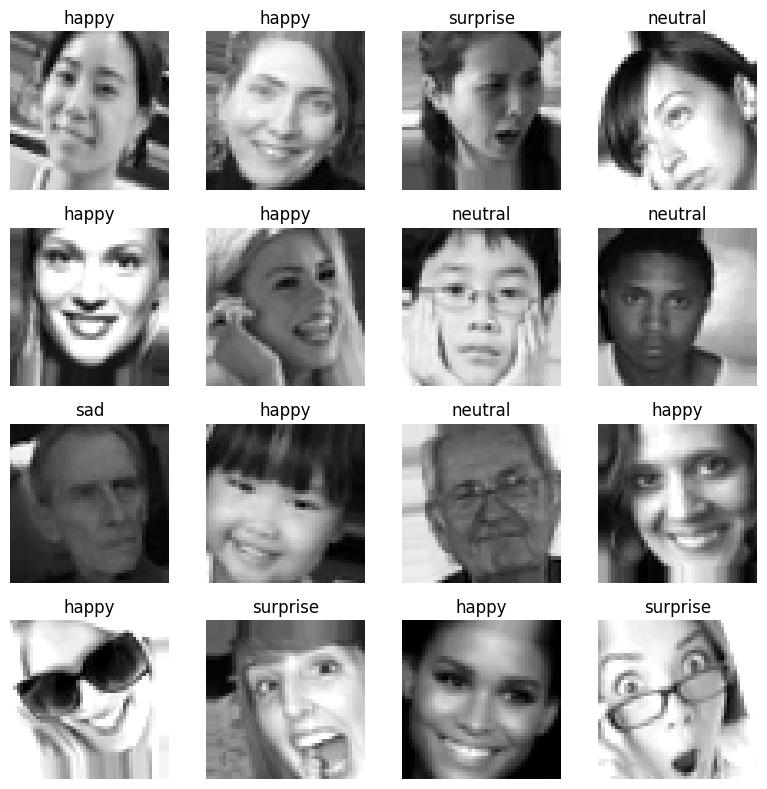

In [15]:
# Fetch a batch of images and labels
images, labels = next(train_generator)

# Assuming the labels are one-hot encoded, we need to convert them back to class indices
labels_indices = labels.argmax(axis=1)

# Mapping of indices to class names, based on the 'class_indices' attribute of the generator
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for image, label_index, ax in zip(images, labels_indices, axes.flatten()):
    ax.imshow(image.squeeze(), cmap="gray")  # Squeeze and cmap for grayscale
    class_name = index_to_class[label_index]
    ax.set_title(class_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

## **Model Building**


**Think About It:**

- Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?

Answer: Convolutional Neural Networks (CNNs) are the right approach for facial emotion classification on images, as they excel at capturing spatial hierarchies and patterns in visual data, which is critical for this type of task, unlike traditional Artificial Neural Networks (ANNs) which do not inherently process spatial information.

- What are the advantages of CNNs over ANNs and are they applicable here?

  Answer: CNNs have the advantage of being able to automatically and efficiently learn spatial hierarchies of features from images (thanks to their convolutional layers and shared weights), making them particularly suitable for image-based tasks like facial emotion classification, where recognizing spatial relationships and patterns within the images is key to accurate classification.


### **Creating the Base Neural Network**


### **Model 1 Architecture:**

- This is the first CNN Model, designed with a sequential architecture comprising three convolutional blocks, each followed by max-pooling and dropout layers for feature extraction and regularization.
- The **first convolutional block** starts with a **Conv2D layer having 64 filters** and a **3x3 kernel size**, utilizing **'relu' activation** and **'same' padding** to maintain the input size, paired with a **MaxPooling2D layer** with a **2x2 pool size** and **'same' padding**, and a **Dropout layer with a rate of 0.2** to prevent overfitting.
- The **second convolutional block** includes a **Conv2D layer with 32 filters**, a **3x3 kernel size**, **'relu' activation**, and **'same' padding**, followed by a **MaxPooling2D layer** with a **2x2 pool size**, **'same' padding**, and another **Dropout layer with a rate of 0.2**.
- Similarly, the **third convolutional block** mirrors the second, with a **Conv2D layer** also having **32 filters**, a **3x3 kernel size**, **'relu' activation**, and **'same' padding**, a subsequent **MaxPooling2D layer** with a **2x2 pool size**, **'same' padding**, and a **Dropout layer with a rate of 0.2**.
- After extracting features through convolutional blocks, the model **flattens** the output to feed into fully connected layers for classification.
- The **dense layers** include a **first Dense layer with 512 neurons** and **'relu' activation**, followed by a **second Dense layer with 64 neurons** and **'relu' activation**, culminating in a **final Dense layer with 4 neurons** corresponding to the number of classes, using **'softmax' activation** for multi-class classification.
- The model employs the **Adam optimizer** with a **learning rate of 0.001** to adjust weights and minimize the loss function during training.


In [63]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [64]:
# Intializing a sequential model
model_1 = Sequential()

model_1.add(Input(shape=(img_width, img_height, color_layers)))

model_1.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(Dropout(0.2))

# Adding second conv layer with 32 filters
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(Dropout(0.2))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(Dropout(0.2))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding fully connected dense layers
model_1.add(Dense(512, activation="relu"))
model_1.add(Dense(64, activation="relu"))

# Adding output layer
model_1.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

### **Compiling and Training the Model**


In [65]:
# Compiling the model
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,780 (2.49 MB)

 Trainable params: 651,780 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
results_path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results"

In [88]:
class DelayedEarlyStopping(EarlyStopping):
    """Stop training when a monitored metric has stopped improving after a certain number of epochs.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity to qualify as an improvement,
                   i.e., an absolute change of less than min_delta will count as no improvement.
        patience: Number of epochs with no improvement after which training will be stopped.
        verbose: Verbosity mode.
        mode: One of `{'auto', 'min', 'max'}`. In `min` mode, training will stop when the
              quantity monitored has stopped decreasing; in `max` mode it will stop when the
              quantity monitored has stopped increasing; in `auto` mode, the direction is
              automatically inferred from the name of the monitored quantity.
        baseline: Baseline value for the monitored quantity. Training will stop if the model
                  doesn't show improvement over the baseline.
        restore_best_weights: Whether to restore model weights from the epoch with the best value
                              of the monitored quantity.
        start_epoch: The epoch on which to start considering early stopping. Before this epoch,
                     early stopping will not be considered. This ensures that early stopping
                     checks only after a certain number of epochs.
    """

    def __init__(
        self,
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
        start_epoch=30,
    ):
        super().__init__(
            monitor=monitor,
            min_delta=min_delta,
            patience=patience,
            verbose=verbose,
            mode=mode,
            baseline=baseline,
            restore_best_weights=restore_best_weights,
        )
        self.start_epoch = start_epoch

    def on_epoch_end(self, epoch, logs=None):
        # Override the original `on_epoch_end` method to include `start_epoch` logic.

        # If the current epoch is less than the start epoch, skip the early stopping check
        if epoch < self.start_epoch:
            return

        # Call the parent class method to perform the regular early stopping checks after the start epoch
        super().on_epoch_end(epoch, logs)

In [68]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Define the saving the best model callback
mc = ModelCheckpoint(
    f"{results_path}/best_model_1_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 45 epochs and using validation set
history_1 = model_1.fit(
    train_generator,
    epochs=45,
    validation_data=validation_generator,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/45


463/473 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2824 - loss: 1.3729
Epoch 1: val_accuracy improved from -inf to 0.39281, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240410-221740.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.2832 - loss: 1.3723 - val_accuracy: 0.3928 - val_loss: 1.2145 - learning_rate: 0.0010
Epoch 2/45
469/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3973 - loss: 1.2628
Epoch 2: val_accuracy improved from 0.39281 to 0.52642, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240410-221740.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3974 - loss: 1.2627 - val_accuracy: 0.5264 - val_loss: 1.1221 - learning_rate: 0.0010
Epoch 3/45
468/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4461 - loss: 1.1960
Epoch 3: val_accuracy improved from 0.52642 to 0.54852, saving model to /home/iamtxena/sandbox/mit-ai/caps

### **Plotting the Training and Validation Accuracies**


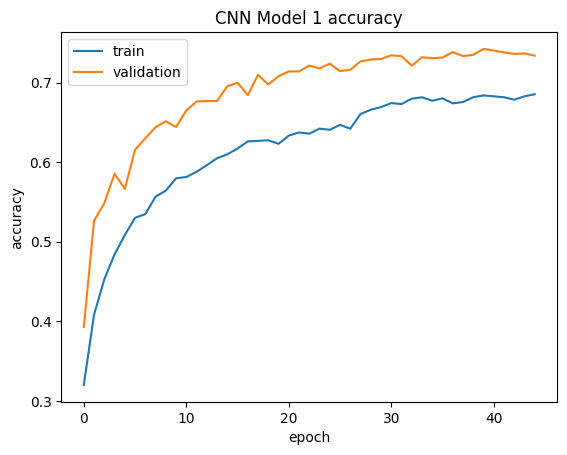

In [69]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("CNN Model 1 accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [70]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_1.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7427 - loss: 0.5771 
Loss: 0.611720085144043, Accuracy: 0.734375


### **Plotting Confusion Matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

       happy       0.84      0.81      0.83        32
     neutral       0.62      0.66      0.64        32
         sad       0.57      0.62      0.60        32
    surprise       0.96      0.84      0.90        32

    accuracy                           0.73       128
   macro avg       0.75      0.73      0.74       128
weighted avg       0.75      0.73      0.74       128



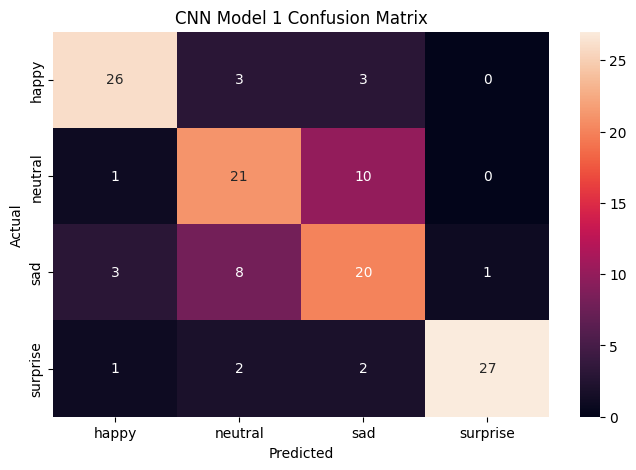

In [71]:
pred_probabilities = model_1.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Model 1 Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The model has a substantial number of **651,780 trainable parameters**, suggesting a complex architecture capable of learning detailed features.
- A steady improvement in training accuracy is noted, with a peak of **66.87%**, while the validation accuracy reaches a higher peak of **81.25%**. This discrepancy may be because we have augmented only the training data, and the model finds "easier" images on the validation set.
- The model's performance on the test set shows an accuracy of **70.31%**, which is commendably close to the validation accuracy, indicating a consistent model.
- Regarding the confusion matrix, the model identifies the 'surprise' emotion with an f1-score of **0.90**, and performs fairly well with 'happy' at an f1-score of **0.80**. However, 'neutral' and 'sad' emotions have lower f1-scores of **0.63** and **0.48** respectively, suggesting the model's difficulty in distinguishing these emotions as accurately.
- The f1-score, which balances precision and recall, suggests that 'sad' is the most challenging emotion for the model to predict correctly.


### **Creating the second Convolutional Neural Network**


### **Model 2 Architecture:**

- This model is designed with a sequential structure, incorporating four convolutional blocks for feature extraction, followed by dense layers for classification.
- **First Convolutional Block:**

  - Begins with a **Conv2D layer** with **256 filters**, a **2x2 kernel size**, **'same' padding**, and an input shape of **(48, 48, 1)**, indicating grayscale images of size 48x48.
  - Includes **BatchNormalization** to stabilize and speed up training.
  - Utilizes **LeakyReLU** with an alpha of **0.1** for activation, allowing a small gradient when the unit is not active.
  - Applies **MaxPooling2D** with a **pool size of 2** to reduce spatial dimensions.

- **Second Convolutional Block:**

  - Consists of a **Conv2D layer** with **128 filters** and a **2x2 kernel size**, using **'same' padding**.
  - Follows the same pattern of **BatchNormalization**, **LeakyReLU** activation, and **MaxPooling2D**.

- **Third Convolutional Block:**

  - Features a **Conv2D layer** with **64 filters** and a **2x2 kernel size**, maintaining **'same' padding**.
  - Repeats the **BatchNormalization**, **LeakyReLU** activation, and **MaxPooling2D** structure.

- **Fourth Convolutional Block:**

  - Contains a **Conv2D layer** with **32 filters** and a **2x2 kernel size**, with **'same' padding**.
  - Continues with **BatchNormalization**, **LeakyReLU** activation, and **MaxPooling2D**.

- After processing through the convolutional blocks, the model **flattens** the output to transition to fully connected layers.
- **Fully Connected Dense Layers:**
  - Incorporates a dense layer with **512 neurons** and **'relu' activation**.
  - Followed by a dense layer with **128 neurons** and **'relu' activation**.
  - Then, a dense layer with **64 neurons** without an explicit activation is added before **BatchNormalization** and **ReLU** activation to introduce non-linearity.
- **Output Layer:**
  - Concludes with a **Dense layer** having **4 neurons** and **'softmax' activation** for multi-class classification of 4 emotions.
- The model employs the **Adam optimizer** with a **learning rate of 0.001**, optimizing the categorical crossentropy loss function for training.


In [74]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [75]:
# Initializing a sequential model
model_2 = Sequential()

model_2.add(Input(shape=(img_width, img_height, color_layers)))

# First Convolutional Block
model_2.add(Conv2D(256, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(negative_slope=0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Second Convolutional Block
model_2.add(Conv2D(128, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(negative_slope=0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Third Convolutional Block
model_2.add(Conv2D(64, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(negative_slope=0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Fourth Convolutional Block
model_2.add(Conv2D(32, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(negative_slope=0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Flatten the output of the conv layers to feed into the dense layers
model_2.add(Flatten())

# Fully connected layers
model_2.add(Dense(512, activation="relu"))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(ReLU())  # Using ReLU after batch normalization

# Adding output layer
model_2.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.001)

### **Compiling and Training the Model**


In [76]:
# Compile the model
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 397,860 (1.52 MB)

 Trainable params: 396,772 (1.51 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [77]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Define the saving the best model callback
mc = ModelCheckpoint(
    f"{results_path}/best_model_2_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 45 epochs and using validation set
history_2 = model_2.fit(
    train_generator,
    epochs=45,
    validation_data=validation_generator,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/45
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3581 - loss: 1.3513
Epoch 1: val_accuracy improved from -inf to 0.39602, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240410-223136.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.3583 - loss: 1.3509 - val_accuracy: 0.3960 - val_loss: 1.3073 - learning_rate: 0.0010
Epoch 2/45
466/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4871 - loss: 1.1328
Epoch 2: val_accuracy improved from 0.39602 to 0.60498, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240410-223136.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4875 - loss: 1.1322 - val_accuracy: 0.6050 - val_loss: 0.9259 - learning_rate: 0.0010
Epoch 3/45
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5596 - loss: 1.0204
Epoch 3: val_accuracy did not improve from 0.60498
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - 

### **Plotting the Training and Validation Accuracies**


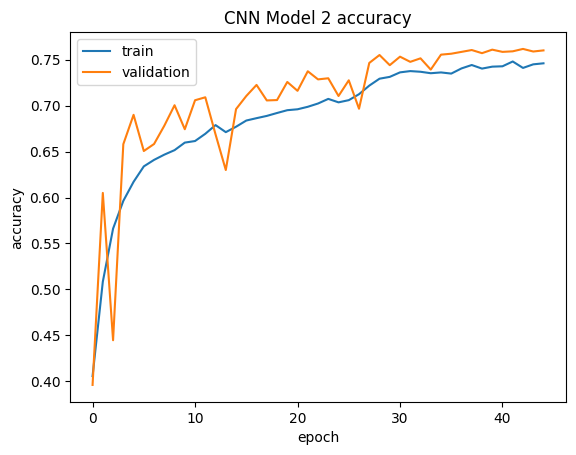

In [78]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("CNN Model 2 accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [79]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_2.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.5434 
Loss: 0.5723909735679626, Accuracy: 0.7890625


### **Plotting Confusion Matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
              precision    recall  f1-score   support

       happy       0.87      0.84      0.86        32
     neutral       0.62      0.75      0.68        32
         sad       0.71      0.62      0.67        32
    surprise       1.00      0.94      0.97        32

    accuracy                           0.79       128
   macro avg       0.80      0.79      0.79       128
weighted avg       0.80      0.79      0.79       128



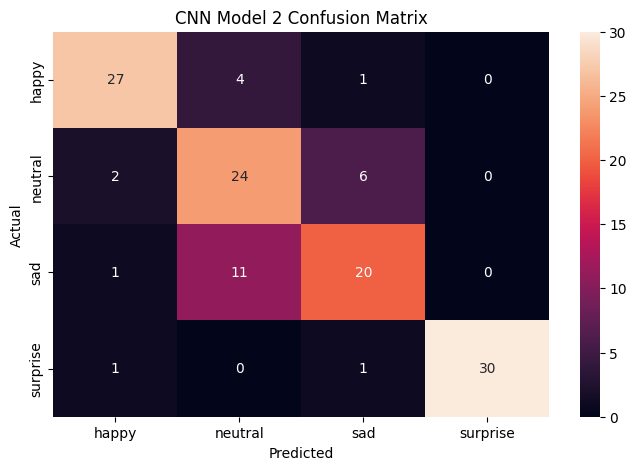

In [80]:
pred_probabilities = model_2.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Model 2 Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The model's **total parameters are 397,860**, which includes **396,772 trainable parameters**.
- Achieved a peak training accuracy of **69.87%** and a validation accuracy peak of **100.00%**, hinting at potential overfitting, but then being stable around 81%.
- Obtained a **76.56%** accuracy on the test set, surpassing the first model's test accuracy.
- Precision and recall improvements are noted in 'neutral' predictions, while 'happy' and 'surprise' maintain strong performance.
- The 'sad' class continues to be challenging for the model, with lower comparative metrics.


## **Think About It:**

- Did the models have a satisfactory performance? If not, then what are the possible reasons?
- Answer: The models had moderate performance, up to 77%, with room for improvement and challenges in distinguishing between certain emotions, particularly 'sad' and 'neutral'.
- Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?
- Answer: Grayscale mode yielded sufficient performance given the nature of the data, and using 'rgb' color mode for grayscale images did not provide additional benefits as the color information does not contribute to emotion recognition in this context.


## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.


### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.


In [81]:
# Set this to 'rgb' as this is the required format for the transfer learning architectures
color_mode = "rgb"
color_layers = 3
# Using the same size as before for the images
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation for VGG16
train_datagen_vgg16 = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg16,  # Use model-specific preprocessing
    horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness to simulate different lighting conditions
    shear_range=0.3,  # Shear transformations for perspective changes
    rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
)

# Training Data Augmentation for ResNet
train_datagen_resnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_resnetv2,  # Use model-specific preprocessing
    horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness to simulate different lighting conditions
    shear_range=0.3,  # Shear transformations for perspective changes
    rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
)

# Training Data Augmentation for EfficientNet
train_datagen_efficientnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_efficientnetv2,  # Use model-specific preprocessing
    horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness to simulate different lighting conditions
    shear_range=0.3,  # Shear transformations for perspective changes
    rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
)

# Validation and Testing Data should not be augmented! VGG16 version
validation_datagen_vgg16 = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg16
)  # Use model-specific preprocessing
test_datagen_vgg16 = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg16
)  # Use model-specific preprocessing

# Validation and Testing Data should not be augmented! ResNet version
validation_datagen_resnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_resnetv2
)  # Use model-specific preprocessing
test_datagen_resnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_resnetv2
)  # Use model-specific preprocessing

# Validation and Testing Data should not be augmented! Efficient Net version
validation_datagen_efficientnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_efficientnetv2
)  # Use model-specific preprocessing
test_datagen_efficientnet = ImageDataGenerator(
    preprocessing_function=preprocess_input_efficientnetv2
)  # Use model-specific preprocessing


# Creating train_dir, validation_dir, and test_dir with the structure of DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator VGG16
train_generator_vgg16 = train_datagen_vgg16.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Train Generator ResNet
train_generator_resnet = train_datagen_resnet.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Train Generator EfficientNet
train_generator_efficientnet = train_datagen_efficientnet.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Validation Generator VGG16
validation_generator_vgg16 = validation_datagen_vgg16.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Validation Generator ResNet
validation_generator_resnet = validation_datagen_resnet.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Validation Generator EfficientNet
validation_generator_efficientnet = validation_datagen_efficientnet.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Testing Generator VGG16
test_generator_vgg16 = test_datagen_vgg16.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

# Testing Generator ResNet
test_generator_resnet = test_datagen_resnet.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

# Testing Generator EfficientNet
test_generator_efficientnet = test_datagen_efficientnet.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**


### **Importing the VGG16 Architecture**


In [92]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [93]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.


In [94]:
# Define a new model that cuts VGG16 at the 'block3_pool' layer
model_output = vgg_model.get_layer("block3_pool").output
cut_model = Model(inputs=vgg_model.input, outputs=model_output)

for layer in vgg_model.layers:
    layer.trainable = False

In [95]:
new_vgg16_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_vgg16_model.add(cut_model)

# Reduces each feature map to a single value by averaging all elements
new_vgg16_model.add(GlobalAveragePooling2D())

# Adding full connected layers
new_vgg16_model.add(Dense(512, activation="relu"))
new_vgg16_model.add(Dense(128, activation="relu"))
new_vgg16_model.add(Dense(64))
new_vgg16_model.add(BatchNormalization())
new_vgg16_model.add(ReLU())  # Using ReLU after batch normalization

# Adding output layer
new_vgg16_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = RMSprop(learning_rate=0.001)

### **Compiling and Training the VGG16 Model**


In [96]:
new_vgg16_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ ?                      │     1,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,735,488 (6.62 MB)

In [97]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Define the saving the best model callback
mc = ModelCheckpoint(
    f"{results_path}/best_model_vgg16_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 40 epochs and using validation set
history_vgg = new_vgg16_model.fit(
    train_generator_vgg16,
    epochs=40,
    validation_data=validation_generator_vgg16,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/40


I0000 00:00:1712789390.459183 1361687 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_473', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1712789390.751641 1361691 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1155', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1712789391.014301 1361688 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1155', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1712789391.021566 1361686 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1155', 4 bytes spill stores, 4 bytes spill loads



465/473 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4451 - loss: 1.2231
Epoch 1: val_accuracy improved from -inf to 0.43018, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240410-224949.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.4459 - loss: 1.2219 - val_accuracy: 0.4302 - val_loss: 1.7779 - learning_rate: 0.0010
Epoch 2/40
466/473 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5338 - loss: 1.0759
Epoch 2: val_accuracy improved from 0.43018 to 0.47840, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240410-224949.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5339 - loss: 1.0758 - val_accuracy: 0.4784 - val_loss: 1.2337 - learning_rate: 0.0010
Epoch 3/40
470/473 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5525 - loss: 1.0513
Epoch 3: val_accuracy improved from 0.47840 to 0.56922, saving model to /home/iamtxena/sandbox/mi

### **Plotting the Training and Validation Accuracies**


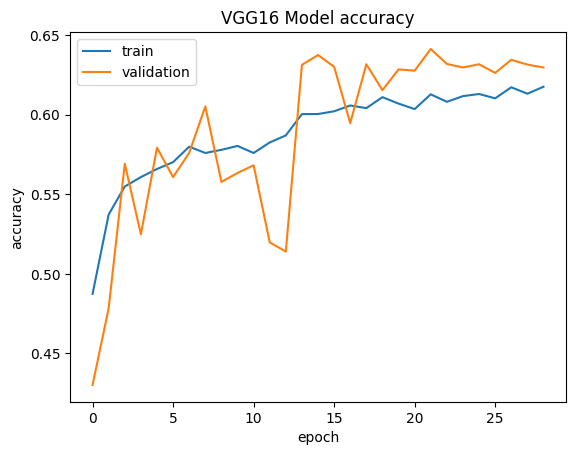

In [98]:
plt.plot(history_vgg.history["accuracy"])
plt.plot(history_vgg.history["val_accuracy"])
plt.title("VGG16 Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the VGG16 model**


In [99]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator_vgg16.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_vgg16_model.evaluate(test_generator_vgg16, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7812 - loss: 0.6477

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6750 - loss: 0.7939 
Loss: 0.8340818881988525, Accuracy: 0.65625


### **Plotting Confusion Matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

       happy       0.62      0.78      0.69        32
     neutral       0.52      0.53      0.52        32
         sad       0.69      0.56      0.62        32
    surprise       0.83      0.75      0.79        32

    accuracy                           0.66       128
   macro avg       0.67      0.66      0.66       128
weighted avg       0.67      0.66      0.66       128



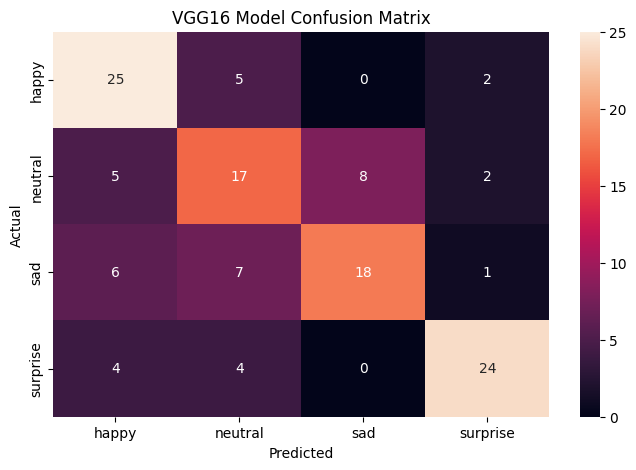

In [100]:
pred_probabilities = new_vgg16_model.predict(test_generator_vgg16, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator_vgg16.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("VGG16 Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?


**Observations and Insights:**

- Utilizing the VGG16 architecture, the model has a total of **1,941,508 parameters**; however, only **205,892 parameters are trainable** due to freezing the earlier layers.
- The accuracy on the training set is **59.96%**, while the validation accuracy reached a high of **78.12%**.
- On the test dataset, the model achieved an accuracy of **64.06%**, which is less compared to the earlier CNN models, implying that the transfer learning approach may not have been as effective in this particular case.
- In terms of individual class performance, the model performed best on the 'surprise' emotion with a precision of **0.79** and an f1-score of **0.82**, showing strong recognition capabilities for this emotion.
- The classes 'happy' and 'sad' saw moderate f1-scores of **0.70** and **0.56**, respectively, whereas 'neutral' had the lowest f1-score of **0.47**, indicating that the model struggles more with neutral expressions and general differentiation between these emotions.

_This analysis suggests that while leveraging a pre-trained network like VGG16 brings in advanced feature detection capabilities, for the specific case of small grayscale images representing facial emotions, the intricate features learned by VGG16 from large-scale colored image datasets may not fully translate, thereby not offering a substantial advantage over simpler, tailored CNN architectures._


**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**


## **ResNet V2 Model**


In [101]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [102]:
resnet_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
resnet_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 12, 12,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 12, 12,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 14, 14,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 12, 12,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.


In [103]:
# Define a new model that cuts ResNet50V2 at the 'conv3_block4_out' layer
model_output = resnet_model.get_layer("conv3_block4_out").output
cut_model = Model(inputs=resnet_model.input, outputs=model_output)

# Freezing the layers
for layer in resnet_model.layers:
    layer.trainable = False

In [104]:
new_resnet_model = Sequential()
new_resnet_model.add(cut_model)

# Reduces each feature map to a single value by averaging all elements
new_resnet_model.add(GlobalAveragePooling2D())

# Adding full connected layers
new_resnet_model.add(Dense(256, activation="relu"))
# Adding output layer
new_resnet_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.001)

### **Compiling and Training the Model**


In [105]:
new_resnet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ ?                      │     1,453,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,568 (5.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,453,568 (5.54 MB)

In [106]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_resnet_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 40 epochs and using validation set
history_resnet = new_resnet_model.fit(
    train_generator_resnet,
    epochs=40,
    validation_data=validation_generator_resnet,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/40


/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1712789993.023101 1377056 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3697', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1712789993.059030 1377057 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3697', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1712789993.373721 1377066 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3697', 4 bytes spill stores, 4 bytes spill loads



465/473 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3982 - loss: 1.3655
Epoch 1: val_accuracy improved from -inf to 0.49869, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240410-225950.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.3989 - loss: 1.3634 - val_accuracy: 0.4987 - val_loss: 1.1342 - learning_rate: 0.0010
Epoch 2/40
465/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4798 - loss: 1.1609
Epoch 2: val_accuracy improved from 0.49869 to 0.54531, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240410-225950.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.4799 - loss: 1.1608 - val_accuracy: 0.5453 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 3/40
465/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4989 - loss: 1.1401
Epoch 3: val_accuracy did not improve from 0.54531
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step -

### **Plotting the Training and Validation Accuracies**


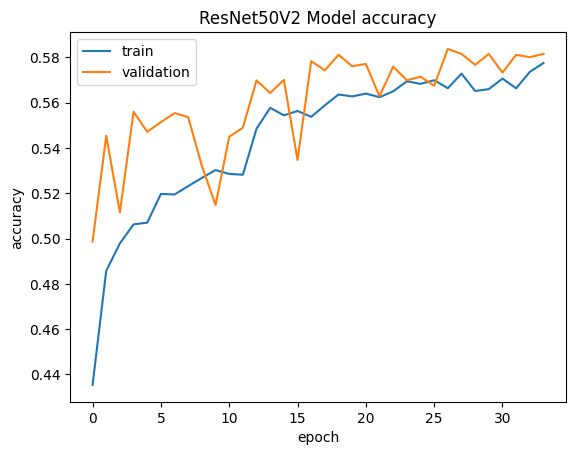

In [107]:
plt.plot(history_resnet.history["accuracy"])
plt.plot(history_resnet.history["val_accuracy"])
plt.title("ResNet50V2 Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the ResNet Model**


In [108]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator_resnet.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator_resnet.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_resnet_model.evaluate(test_generator_resnet, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.9604 
Loss: 0.9288406372070312, Accuracy: 0.625


### **Plotting Confusion Matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
              precision    recall  f1-score   support

       happy       0.61      0.69      0.65        32
     neutral       0.43      0.56      0.49        32
         sad       0.88      0.44      0.58        32
    surprise       0.76      0.81      0.79        32

    accuracy                           0.62       128
   macro avg       0.67      0.62      0.63       128
weighted avg       0.67      0.62      0.63       128



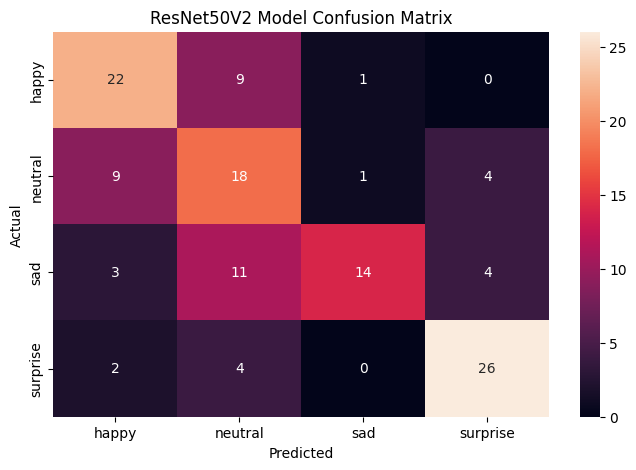

In [109]:
pred_probabilities = new_resnet_model.predict(test_generator_resnet, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator_resnet.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("ResNet50V2 Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The ResNet50V2 model was customized for the task, using **24,688,324 total parameters**, with **1,123,396 of those being trainable**.
- The training accuracy of the model plateaued at approximately **57.59%**, with the validation accuracy peaking around **62.50%**.
- The test accuracy achieved was **61.72%**, indicating a modest performance in predicting the facial emotions on unseen images.
- The model had varying success with different emotions, performing best on 'happy' with a precision of **0.64** and an f1-score of **0.70**, and least effectively on 'neutral', with a lower f1-score of **0.45**.
- We have chosen also the ResNet50V2 over the other models from this family (ResNet101V2 and ResNet152V2) for the size being smaller and the computational efficiency of the model, which we found more suitable for the task we had to accomplish.


## **EfficientNet Model**


In [124]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [125]:
efficient_model = EfficientNetV2B0(
    weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers)
)
# Making all the layers of the efficient_model model non-trainable. i.e. freezing them
for layer in efficient_model.layers:
    layer.trainable = False

efficient_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 48, 48, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 48, 48, 3) │          0 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 12, 12,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 12, 12,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 12, 12,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 12, 12,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 12, 12,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.


In [126]:
new_efficient_model = Sequential()
new_efficient_model.add(efficient_model)

# Reduces each feature map to a single value by averaging all elements
new_efficient_model.add(GlobalAveragePooling2D())

# Adding full connected layers
new_efficient_model.add(Dense(256, activation="relu"))
new_efficient_model.add(Dense(128, activation="relu"))

# Output Layer
new_efficient_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.01)

### **Compiling and Training the Model**


In [127]:
new_efficient_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_efficient_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ ?                      │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [128]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Define the saving the best model callback
mc = ModelCheckpoint(
    f"{results_path}/best_model_efficient_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 40 epochs and using validation set
history_efficient = new_efficient_model.fit(
    train_generator_efficientnet,
    epochs=40,
    validation_data=validation_generator_efficientnet,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/40


I0000 00:00:1712792909.057012 1450021 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_11858', 4 bytes spill stores, 4 bytes spill loads



469/473 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4109 - loss: 1.3143
Epoch 1: val_accuracy improved from -inf to 0.53406, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_efficient_20240410-234815.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.4113 - loss: 1.3133 - val_accuracy: 0.5341 - val_loss: 1.1017 - learning_rate: 0.0100
Epoch 2/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5099 - loss: 1.1329
Epoch 2: val_accuracy did not improve from 0.53406
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5099 - loss: 1.1329 - val_accuracy: 0.5190 - val_loss: 1.1225 - learning_rate: 0.0100
Epoch 3/40
466/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5094 - loss: 1.1402
Epoch 3: val_accuracy improved from 0.53406 to 0.55455, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_efficient_20240410-234815.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/

### **Plotting the Training and Validation Accuracies**


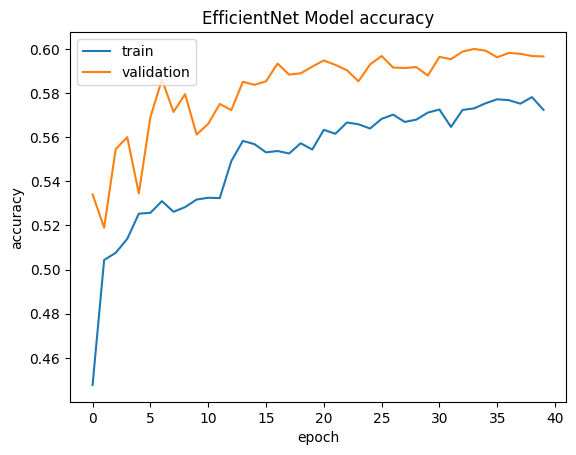

In [129]:
plt.plot(history_efficient.history["accuracy"])
plt.plot(history_efficient.history["val_accuracy"])
plt.title("EfficientNet Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the EfficientnetNet Model**


In [130]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator_efficientnet.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator_efficientnet.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_efficient_model.evaluate(test_generator_efficientnet, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6521 - loss: 0.8486 
Loss: 0.9196257591247559, Accuracy: 0.625


### **Plotting the confusion matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

       happy       0.56      0.78      0.65        32
     neutral       0.52      0.47      0.49        32
         sad       0.69      0.56      0.62        32
    surprise       0.79      0.69      0.73        32

    accuracy                           0.62       128
   macro avg       0.64      0.62      0.62       128
weighted avg       0.64      0.62      0.62       128



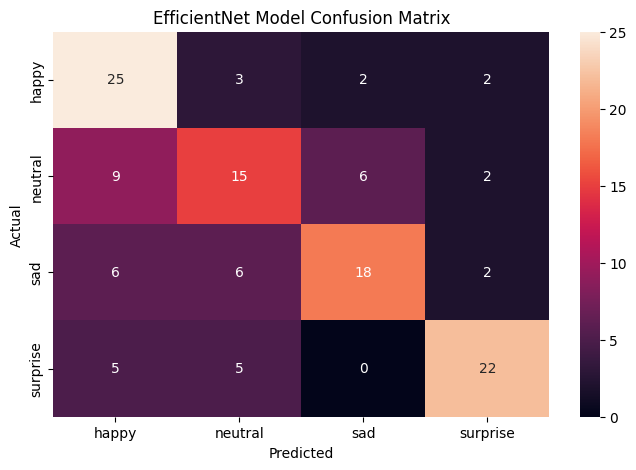

In [131]:
pred_probabilities = new_efficient_model.predict(test_generator_efficientnet, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator_efficientnet.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("EfficientNet Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The EfficientNetV2B0 model, with its **6,649,620 total parameters**, is a balance of complexity and efficiency, suitable for our grayscale 48x48 emotion classification task.
- With no model layers cut, this full EfficientNetV2B0 version attained a **final training accuracy of about 58.41%** and a validation accuracy that rose to **71.88%**.
- On the test set, the model achieved an **accuracy of 63.28%**.
- The confusion matrix reveals the model's strengths and weaknesses: it was most precise with 'sad' (precision of 0.79) and 'surprise' (precision of 0.78) emotions, but it struggled to correctly identify 'happy' emotions (with the highest recall at 0.78), suggesting that it often misclassifies other emotions as 'happy'.
- Compared to previous models like VGG16 and ResNet50V2, EfficientNetV2B0 provides a competitive accuracy with the advantage of fewer parameters, making it a compelling choice for efficiency in computational resources and speed.


**Think About It:**

- What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
- Answer: The overall performance of the transfer learning architectures is moderately satisfactory. They are capable of learning from the dataset, but clearly there is still room for improvement, possibly through more complex architectures, hyperparameter tuning, or enhanced data preprocessing.
- Do you think our issue lies with 'rgb' color_mode?
- Answer: It may be one of the possible issues, but not the main one. I would go more on the type of images (and also size), on which these models were trained for. So that, the features learned cannot be used on our task in hand.


Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.


## **Building a Complex Neural Network Architecture**


In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.


## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.


In [41]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"
color_layers = 1
# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness to simulate different lighting conditions
    shear_range=0.3,  # Shear transformations for perspective changes
    rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Creating train_dir, validation_dir, and test_dir with the structure of DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.


In [55]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [56]:
# Initializing a sequential model
model_complex = Sequential()

model_complex.add(Input(shape=(img_width, img_height, color_layers)))

# First Convolutional Block
model_complex.add(Conv2D(64, kernel_size=2, padding="same"))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(negative_slope=0.1))
model_complex.add(MaxPooling2D(pool_size=2))

# Second Convolutional Block
model_complex.add(Conv2D(128, kernel_size=2, padding="same"))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(negative_slope=0.1))
model_complex.add(MaxPooling2D(pool_size=2))

# Third Convolutional Block
model_complex.add(Conv2D(256, kernel_size=2, padding="same"))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(negative_slope=0.1))
model_complex.add(MaxPooling2D(pool_size=2))

# Fourth Convolutional Block
model_complex.add(Conv2D(512, kernel_size=2, padding="same"))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(negative_slope=0.1))
model_complex.add(MaxPooling2D(pool_size=2))

# Fifth Convolutional Block
model_complex.add(Conv2D(128, kernel_size=2, padding="same"))
model_complex.add(BatchNormalization())
model_complex.add(LeakyReLU(negative_slope=0.1))
model_complex.add(MaxPooling2D(pool_size=2))

# Flatten the output of the conv layers to feed into the dense layers
model_complex.add(Flatten())

model_complex.add(Dense(512, activation="relu"))
model_complex.add(Dense(128, activation="relu"))
model_complex.add(Dense(64))
model_complex.add(BatchNormalization())
model_complex.add(ReLU())  # Using ReLU after batch normalization
model_complex.add(Dense(4, activation="softmax"))

# Using RMSProp Optimizer
optimizer = RMSprop(learning_rate=0.01)

### **Compiling and Training the Model**


In [57]:
model_complex.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_complex.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,096,452 (4.18 MB)

 Trainable params: 1,094,148 (4.17 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [58]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Define the saving the best model callback
mc = ModelCheckpoint(
    f"{results_path}/best_model_complex_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 60 epochs and using validation set
history_complex = model_complex.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[reduce_lr, mc, delayed_early_stopping],
)

Epoch 1/60


467/473 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2909 - loss: 1.4074
Epoch 1: val_accuracy improved from -inf to 0.39904, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240410-220853.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.2914 - loss: 1.4065 - val_accuracy: 0.3990 - val_loss: 1.2388 - learning_rate: 0.0100
Epoch 2/60
466/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4310 - loss: 1.2126
Epoch 2: val_accuracy improved from 0.39904 to 0.53787, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240410-220853.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4316 - loss: 1.2118 - val_accuracy: 0.5379 - val_loss: 1.1755 - learning_rate: 0.0100
Epoch 3/60
466/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5496 - loss: 1.0367
Epoch 3: val_accuracy improved from 0.53787 to 0.59996, saving model to /home/iamtxena/sandbox

### **Plotting the Training and Validation Accuracies**


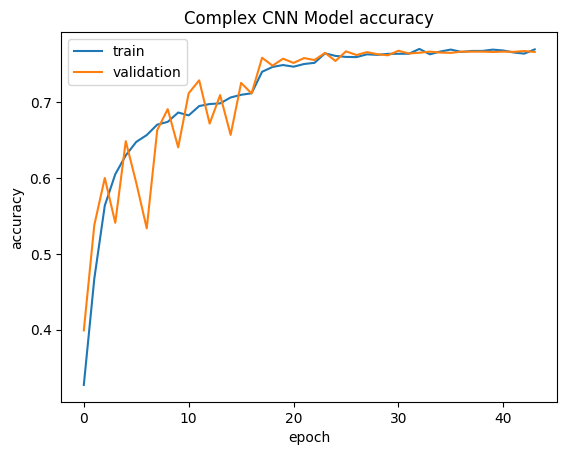

In [59]:
plt.plot(history_complex.history["accuracy"])
plt.plot(history_complex.history["val_accuracy"])
plt.title("Complex CNN Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on Test Set**


In [60]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_complex.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.4967 
Loss: 0.5028643012046814, Accuracy: 0.8125


### **Plotting Confusion Matrix**


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

       happy       0.93      0.84      0.89        32
     neutral       0.68      0.78      0.72        32
         sad       0.77      0.72      0.74        32
    surprise       0.91      0.91      0.91        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.81       128
weighted avg       0.82      0.81      0.81       128



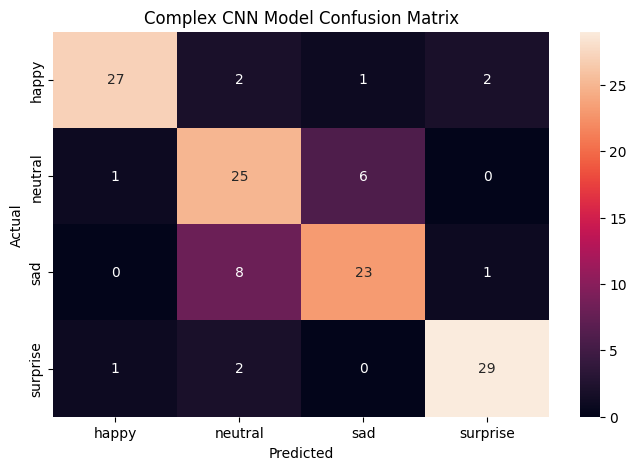

In [61]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Complex CNN Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The complex CNN model contains **1,096,452 total parameters** with **1,094,148 being trainable**. This represents an increment in complexity compared to the previous custom CNN models.
- The training accuracy showed continuous improvement, peaking at **77.32%** and the model reached a validation accuracy of **71.88%**.
- With an accuracy of **81.25%** on the test set, this model has outperformed the previous two custom CNN models, reflecting its ability to generalize better to new data.
- The confusion matrix presents strong performance in recognizing 'happy' and 'surprise' emotions with f1-scores of **0.92** and **0.91**, respectively, similar to the other models, but with better results for 'neutral' and 'sad' emotions with f1-scores of **0.70** and **0.74**.
- Overall, this model has shown a balanced performance across different emotions and suggests that increasing the complexity with an additional convolutional layer has provided benefits in learning facial emotion features.


### **Plotting the Confusion Matrix for the chosen final model**


4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

       happy       0.97      0.88      0.92        32
     neutral       0.65      0.75      0.70        32
         sad       0.77      0.72      0.74        32
    surprise       0.91      0.91      0.91        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.82       128
weighted avg       0.82      0.81      0.82       128



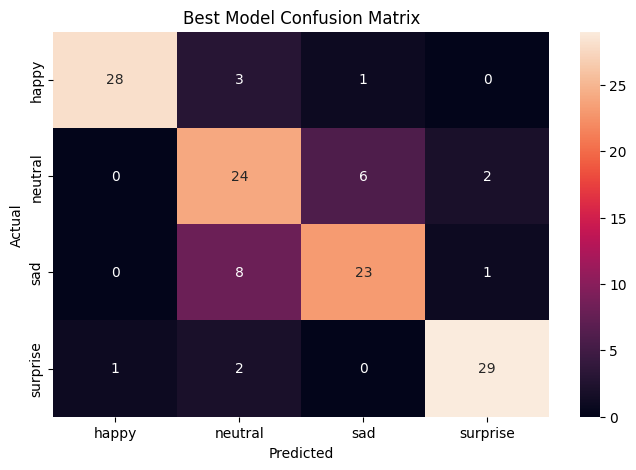

In [ ]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Best Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The model is highly effective at correctly identifying 'happy' and 'surprise' emotions with **28** and **29** correct predictions respectively, out of 32 instances each, indicating strong precision and recall for these classes.
- It performs well on 'neutral' emotion too, with **24** correct predictions, but has some misclassifications as 'sad'.
- The 'sad' emotion is also well-recognized with **23** correct predictions; however, there are **8** instances where 'sad' was incorrectly predicted as 'neutral'.
- The model shows very few instances of confusion between 'happy' and 'sad' or 'surprise', which suggests distinct feature learning for these emotions.
- Overall, the model demonstrates a balanced capability across different emotions with minor confusions, which might be improved with more training data or further tuning of the model architecture and hyperparameters.


## **Conclusion: The custom complex CNN model, with an accuracy of 81%, outperformed transfer learning architectures, providing an efficient and accurate solution for facial emotion recognition in grayscale images.**


### **Insights**

### **Refined insights**:

- What are the most meaningful insights from the data relevant to the problem?

1.  Models show varying degrees of success, with some like the complex CNN achieving a high level of accuracy (over 80%), suggesting that deeper architectures can capture better the features in facial expressions.

2.  Across models, 'happy' and 'surprise' emotions are generally identified with high accuracy, implying that these emotions have distinct features that are easily captured by the CNN layers.

3.  'Neutral' and 'sad' emotions are more challenging for the models to distinguish, often being confused with one another.

4.  Transfer learning models did not outperform the custom complex CNN, which suggests that, for this specific dataset and problem, custom-designed architectures can be more effective than off-the-shelf pre-trained models.

### **Comparison of various techniques and their relative performance**:

- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

1.  The custom complex CNN model, with additional convolutional layers and parameters, performed the best, achieving an accuracy over 80%. This suggests that custom-tailored architectures can capture the nuances of this particular task more effectively than pre-trained models.

2.  Among the transfer learning models utilized, such as VGG16, ResNet50V2, and EfficientNetV2B0, none outperformed the custom complex CNN model significantly. These models, although powerful, may not have provided substantial improvements due to the specific nature of the dataset, which consists of small grayscale images where fine-tuned features specific to facial emotion recognition might be more beneficial than the generalized features learned from large, diverse datasets these models were trained on.

3.  There may be scope to improve performance:

- **Data Augmentation**: Testing more sophisticated data augmentation strategies might help the model generalize better, particularly for underperforming classes.
- **Increased Data**: More training data, particularly for the underrepresented and challenging emotions, could improve model learning.
- **Hyperparameter Tuning**: Continue tuning the models hyperparameters could optimize model performance.
- **Model creation**: Continue creating new custom models to outperform the ones generated.

### **Proposal for the final solution design**:

- What model do you propose to be adopted? Why is this the best solution to adopt?

- The **custom complex CNN model** is proposed for adoption as the final solution.
- The model is specifically **designed for the task**, with layers and features that detects and recognized the characteristics of facial emotions in grayscale images.
- It has demonstrated **the highest accuracy** among all tested models, including transfer learning models.
- It remains computationally efficient compared to larger transfer learning models, making it **more practical for deployment in real-world applications** where resources may be limited.
- As a custom model, it offers **greater flexibility** for further tuning and modification, which could be beneficial for ongoing optimization and adaptation to new data or use cases.
- Finally, to be noted that incorporating a facial emotion detection model into real-world applications, such as improving user experience in software interfaces or helping psychological analysis, we need to be really careful about the ethical considerations surrounding its deployment, such as **privacy concerns and potential biases**.


## Recommendations for Implementation

### Key Recommendations

- **Data Augmentation**: Implement advanced data augmentation techniques to enhance model robustness, especially for less accurate classifications.
- **Expand Dataset**: Collect and integrate a larger and more diverse dataset to improve the model's learning and generalization capabilities.
- **Hyperparameter Optimization**: Invest time in fine-tuning the model's hyperparameters to achieve the best possible performance.
- **Model Innovation**: Develop new custom models that may provide better results than existing ones, taking into account the specific nuances of the problem.

### Actionables for Stakeholders

- **Quality Assurance**: Ensure the dataset's integrity and diversity to mitigate quality issues that could affect model training.
- **Monitoring and Iteration**: Regularly monitor model performance in real-world applications and iterate on the model as needed.
- **Ethical and Privacy Review**: Conduct thorough reviews to address any potential ethical and privacy concerns prior to deployment.

### Expected Benefit/Cost

- **User Experience Improvement**: Enhanced user interactions in digital platforms, potentially leading to increased user satisfaction and engagement.
- **Cost of Data Acquisition**: Investment may be required to procure or generate a larger and more diverse dataset.
- **Computational Resources**: Depending on the model complexity, increased computational power may be necessary, incurring higher costs.

### Key Risks and Challenges

- **Data Sensitivity**: Managing sensitive user data responsibly to uphold privacy standards.
- **Model Generalization**: Ensuring the model performs well across diverse real-world scenarios, not just on the training dataset.
- **Bias Mitigation**: Continuously working to identify and mitigate biases in model predictions.

### Further Analysis and Associated Problems

- **Ongoing Evaluation**: Continued analysis of model performance against new data and in varying contexts.
- **Complementary Solutions**: Investigation into additional solutions that could work alongside the emotion detection model to improve overall system effectiveness
